#### Project Scenario

You are a Data Scientist in an epidemiology department

The government is waging a war on diabetes. and you're at the frontline. Your weapon is your Python skills, and your bullets are data

In this project, you will train a machine learning model to predict whether an individual is at the rsik of getting diabetes

#### Parts

- Part 1: Data collection and cleaning
- Part 2: Data visualization and statistics
- Part 3: Machine learning model training

## Part 1: Data collection and cleaning

In [1]:
# import data manipulation libraries
import pandas as pd
import numpy as np

# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# import statistaical libraries
from scipy.stats import chi2_contingency
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest


# import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Google "early stage diabetes risk prediction dataset"
# Data source = UCI Repository

In [3]:
df = pd.read_csv("dataset 2/diabetes_data_upload.csv")

In [4]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
# shape
df.shape

(520, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [7]:
# cleaning the data set
# cleaning the casing of the columns head
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [8]:
# convert to lowercase with underscores

df.columns = [x.strip().replace(" ", "_").lower() for x in df.columns]

In [9]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [10]:
# data either either True or False
# No, Negative, Female to 0
# Yes, Positive, Male to 1

df = df.replace("No",0)
df = df.replace("Negative", 0)
df = df.replace("Yes",1)
df = df.replace("Positive", 1)
df = df.replace("Male",1)
df = df.replace("Female", 0)
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [11]:
# replace gender to is_male
df = df.rename(columns = {"gender" : "is_male"})
df.columns

Index(['age', 'is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [12]:
# export dataset to csv
#df.to_csv("dataset 2/diabetes_data_clean.csv", index=None)

### Part 2: Data visualization and statistics

In [13]:
df = pd.read_csv("dataset 2/diabetes_data_clean.csv")

In [14]:
df.tail()
# age is a continous Variable
# the other columns are Categorical Variable

,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### checking one column (univariate analysis)

(array([  1.,  44.,  83., 103.,  91., 118.,  46.,  29.,   1.,   4.]),
 array([16. , 23.4, 30.8, 38.2, 45.6, 53. , 60.4, 67.8, 75.2, 82.6, 90. ]),
 <BarContainer object of 10 artists>)

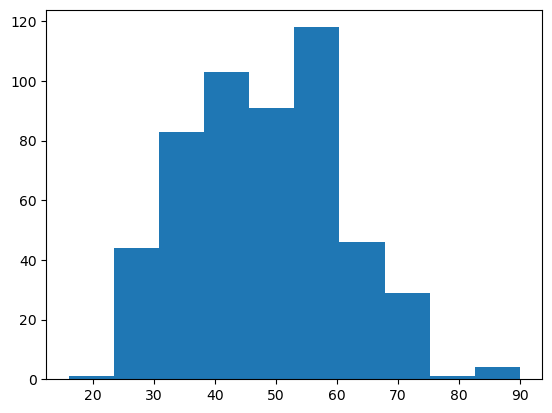

In [15]:
# examine if age is truly continous
plt.hist(df.age)

In [16]:
df.age.describe()

count    520.000000
mean      48.028846
std       12.151466
min       16.000000
25%       39.000000
50%       47.500000
75%       57.000000
max       90.000000
Name: age, dtype: float64

In [17]:
print('mean of age',df.age.mean())
print('median of age',df.age.median())
print('mode of age',df.age.mode())
# Positively Skew since
# Mean > Median > Mode on the X axis

mean of age 48.02884615384615
median of age 47.5
mode of age 0    35
Name: age, dtype: int64


In [18]:
"is_male".replace("_"," ")

'is male'

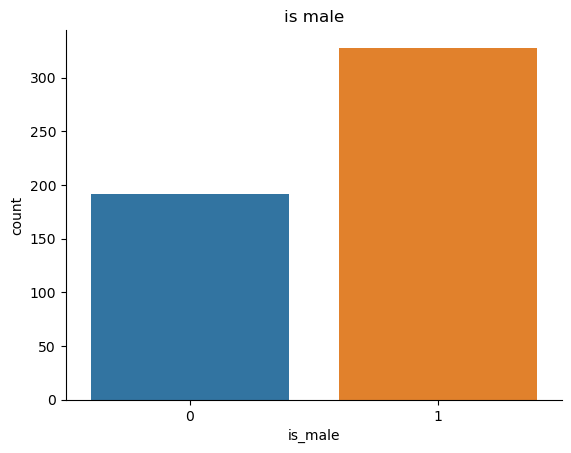

In [19]:
# create s count plot for is_male
sns.countplot(x = 'is_male', data=df)
plt.title('is male')
sns.despine()
plt.show()

In [20]:
df.is_male.value_counts()

is_male
1    328
0    192
Name: count, dtype: int64

In [21]:
columns = df.columns[1:]
columns

Index(['is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

__This approach is only advisible for dataframe with few columns__

#### relationship between two columns (bivariate analysis)

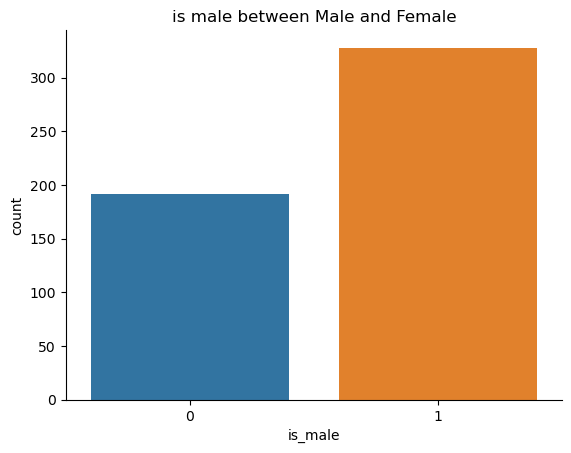

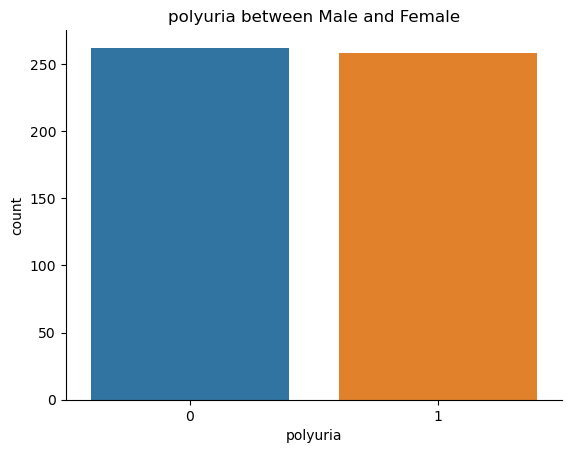

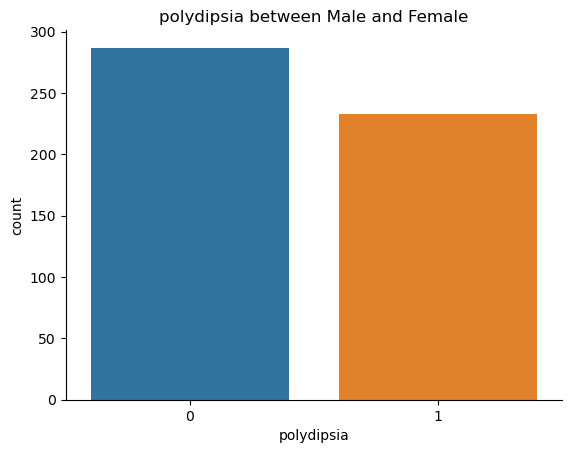

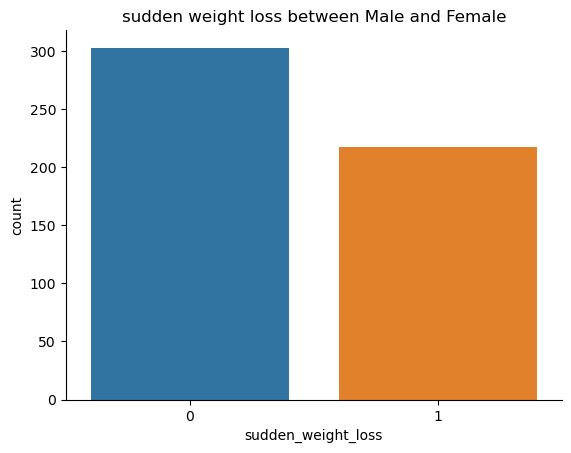

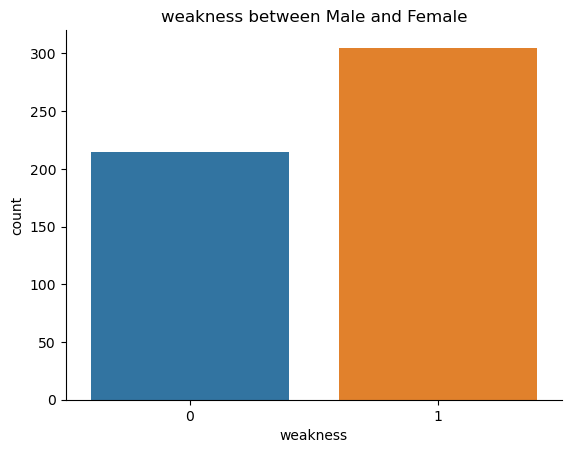

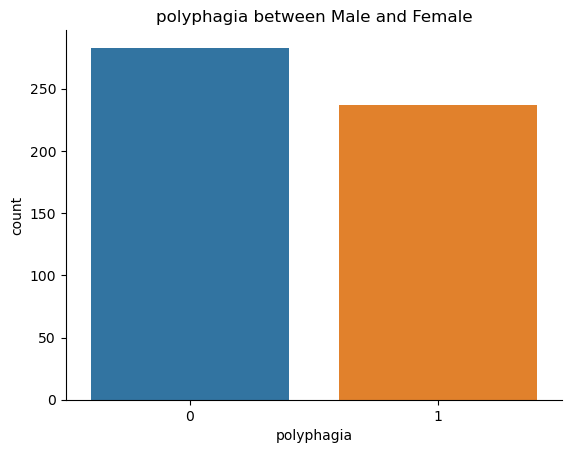

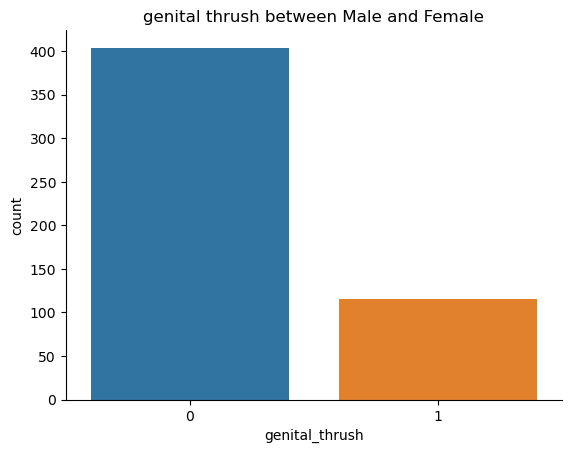

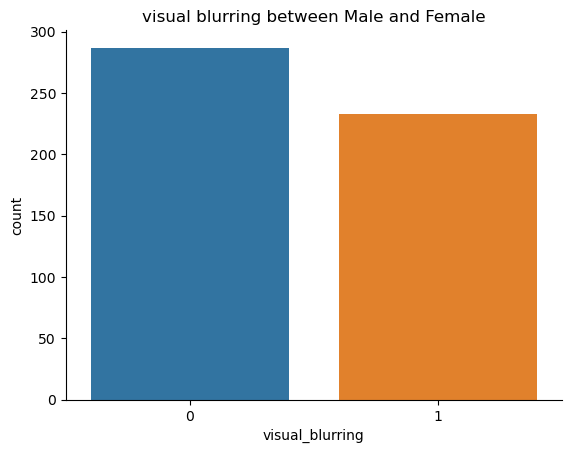

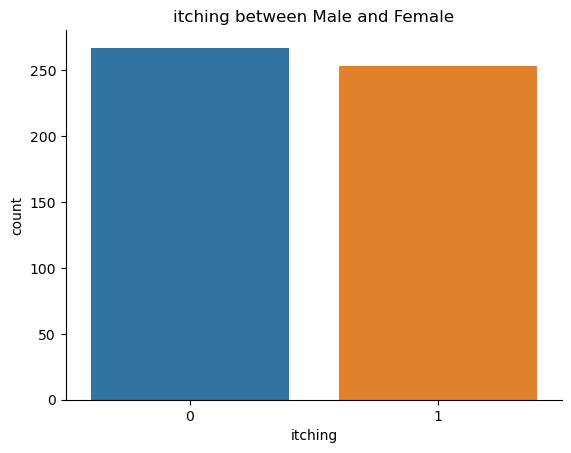

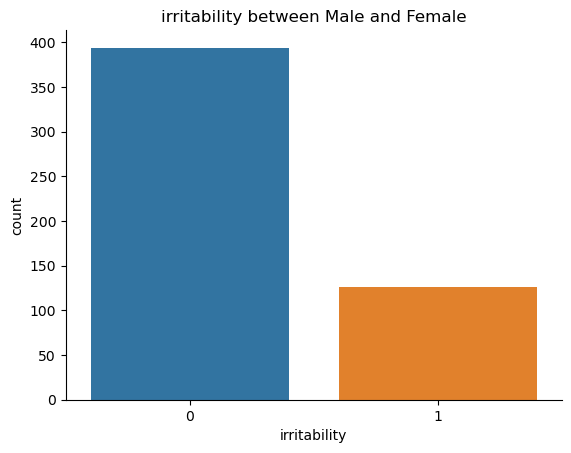

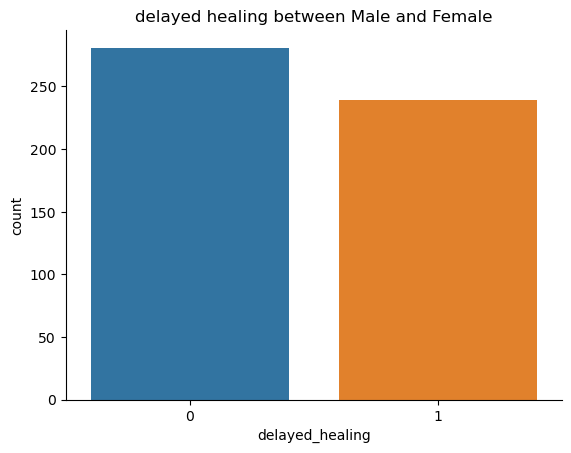

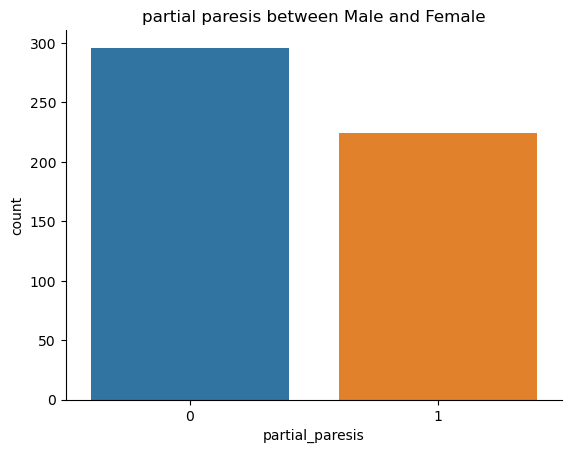

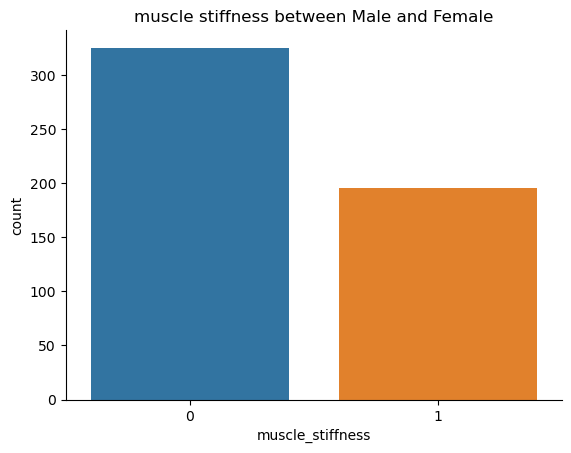

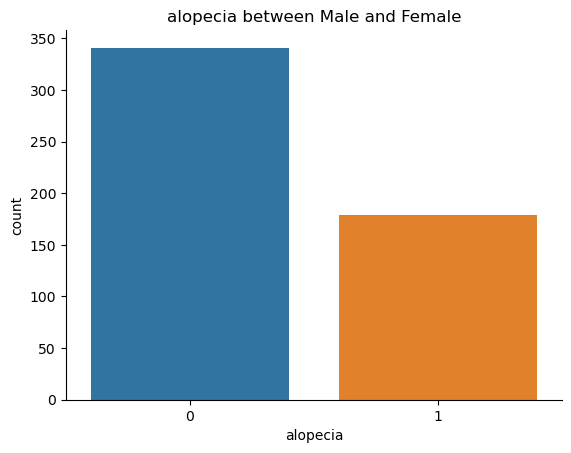

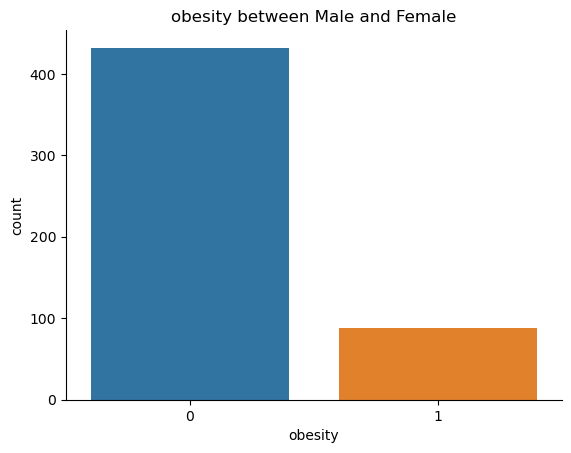

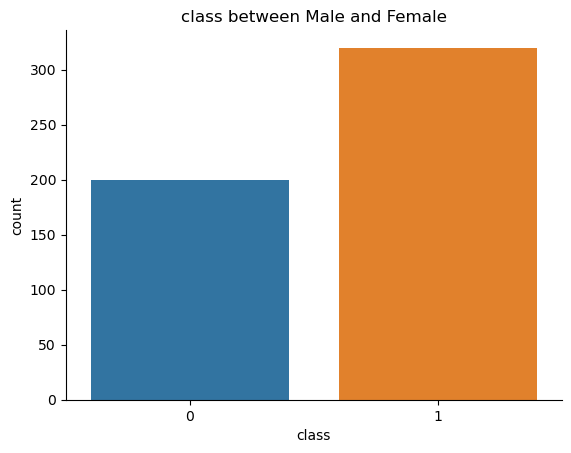

In [22]:
# iterating through all columns
for column in columns:
    sns.countplot(x = column, data=df)
    plt.title(f"{column}".replace("_", " ") + " between Male and Female")
    sns.despine()
    plt.show()

#### Questions
1. Is obesity related to diabetes status?
2. Is age related to diabetes status? 

#### 1. Is obesity related to diabetes status?

In [23]:
obesity_diabetes_crosstab = pd.crosstab(df['class'], df['obesity'])
obesity_diabetes_crosstab

obesity,0,1
class,,
0,173,27
1,259,61


In [24]:
chi2_contingency(obesity_diabetes_crosstab)

Chi2ContingencyResult(statistic=2.3274739583333344, pvalue=0.12710799319896815, dof=1, expected_freq=array([[166.15384615,  33.84615385],
       [265.84615385,  54.15384615]]))

In [25]:
var = ['high square statistics', 'pvalue', 'degree of freedom','expected array']

In [26]:
for i,j in zip(var,chi2_contingency(obesity_diabetes_crosstab)):
    print(i, '=', j, '\n')

high square statistics = 2.3274739583333344 

pvalue = 0.12710799319896815 

degree of freedom = 1 

expected array = [[166.15384615  33.84615385]
 [265.84615385  54.15384615]] 



__This is use to test for independence between data__

let's test for 
1. polyuria vs class
2. is_male vs polyuria

In [27]:
# functton that test for independence

def test_independence(data1, data2):
    crosstab = pd.crosstab(df[data1], df[data2])
    print(crosstab,'\n')
    for i,j in zip(var,chi2_contingency(crosstab)):
        print(i, '=>', j, '\n')
    

In [28]:
test_independence('polyuria', 'class')

class       0    1
polyuria          
0         185   77
1          15  243 

high square statistics => 227.86583895496773 

pvalue => 1.7409117803442155e-51 

degree of freedom => 1 

expected array => [[100.76923077 161.23076923]
 [ 99.23076923 158.76923077]] 



In [29]:
test_independence('is_male','polyuria')

polyuria    0    1
is_male           
0          63  129
1         199  129 

high square statistics => 36.49184228561174 

pvalue => 1.5330652930649977e-09 

degree of freedom => 1 

expected array => [[ 96.73846154  95.26153846]
 [165.26153846 162.73846154]] 



#### 2. Is age related to diabetes status?

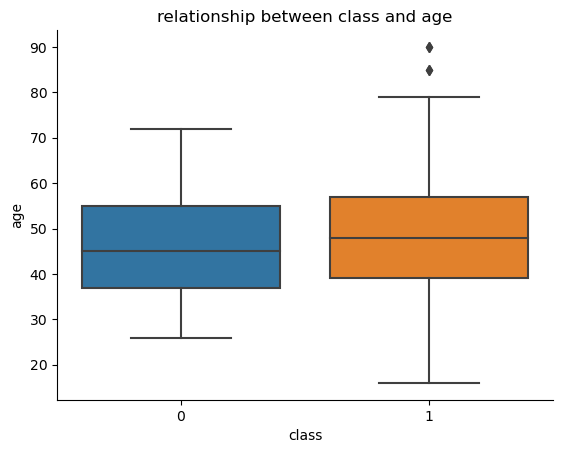

In [30]:
# examine the relationship
sns.boxplot(x = 'class', y = 'age', data=df)
plt.title('relationship between class and age')
sns.despine()
plt.show()

In [31]:
# without diabetes, class = 0
no_diabetes = df[df['class'] == 0]
no_diabetes['age'].median()

45.0

In [32]:
# with diabetes, class = 1
diabetes = df[df['class'] == 1]
diabetes['age'].median()

48.0

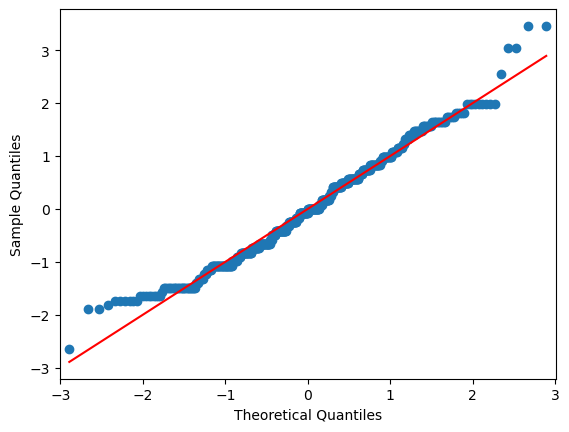

In [33]:
# lets check if our distribution is normal
qqplot(df['age'], fit=True, line='s')
plt.show()

##### The plot shows that the distribution is normal because most of our data falls within the line

#### statistical test of difference between ages of non-diabetic and diabetic patients

Using __Ztest__ to test the difference to see if there is a link between diabetes and age

__z-test__ is a hypothesis test used to determine whether a sample mean is statistically diffrent from a known population mean when the population standard deviation is known.

In [34]:
# conduct z-test of difference
ztest(diabetes['age'], no_diabetes['age'])

(2.4882300316303065, 0.012838066562901769)

In [35]:
value = ['z-test', 'pvalue']
for i,j in zip(value, ztest(diabetes['age'], no_diabetes['age'])):
    print(i, '=>', j)

z-test => 2.4882300316303065
pvalue => 0.012838066562901769


The hypothesis is rejected because the __pvalue__ is too low

In [36]:
# correlation between each columns
df.corr()

,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
is_male,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


<Axes: >

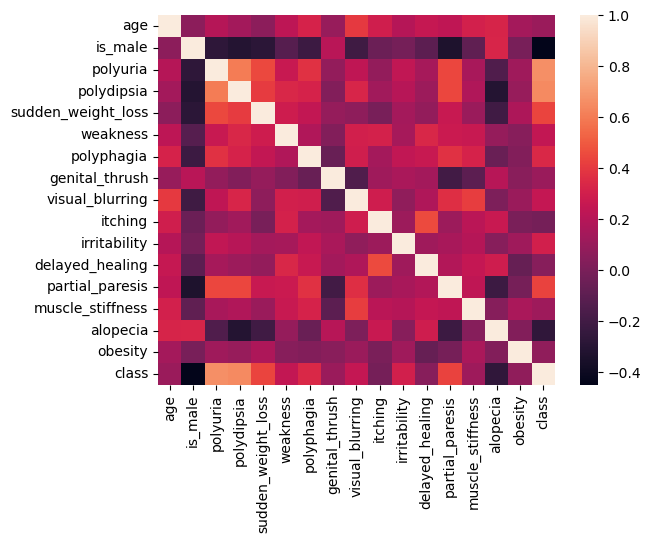

In [37]:
# heatmap on the data
sns.heatmap(df.corr())

### Part 3: Machine learning model training

This is a classification problem since we would predicting if a person has or does not have diabetes.

#### prepare our independent and dependent variable 

__Independent Variables__: These are the variables that are inputs to the model. In this dataset, 'Age', 'Gender', 'Polyuria', 'Polydipsia', and so on, are potential independent variables. They are the features used to predict the target variable.

we drop or remove the __class data__

In [45]:
# indepedent variable
X = df.drop('class', axis = 1)

In [48]:
X.columns.values

array(['age', 'is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'], dtype=object)

__Dependent Variable__: This is the variable that the model is trying to predict. In this case, 'Class' is the dependent variable. The goal of the machine learning model would be to predict whether an individual is positive or negative for a certain condition based on the information provided in the independent variables

In [49]:
# dependent variable
y = df['class']

In [54]:
y.name

'class'

In [68]:
# split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

#### DummyClassifier model

In [69]:
# model training
# establishing baseline with DummyClassifier
# randomly guess if a patient has or not

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

In [70]:
# assess DummyClassifier model
# y_test is the actual value
# dummy_pred is the prediction
confusion_matrix(y_test, dummy_pred)

array([[ 0, 40],
       [ 0, 64]])

The confusion matrix is a 2x2 matrix with the following components:
```
array([[ 0, 40],
       [ 0, 64]])
```

|||BREAKDOWN||
|---|---|---|---|
|||PREDICTION|PREDICTION|
|||0|1|
|ACTUAL|0|TN|FP|
|ACTUAL|1|FN|TP|

Let's break down the components:

- **True Negative (TN):** 0
- **False Positive (FP):** 40
- **False Negative (FN):** 0
- **True Positive (TP):** 64

Here's what each term represents:

- **True Negative (TN):** The number of instances that were correctly predicted as the negative class (0 in this case).
- **False Positive (FP):** The number of instances that were incorrectly predicted as the positive class (1 in this case).
- **False Negative (FN):** The number of instances that were incorrectly predicted as the negative class (0 in this case).
- **True Positive (TP):** The number of instances that were correctly predicted as the positive class (1 in this case).

Now, let's analyze the implications:

- The model correctly predicted all instances of the negative class (0).
- The model incorrectly predicted 40 instances as the positive class (1), which constitutes False Positives.
- The model correctly predicted all instances of the positive class (1).
- There are no False Negatives (instances of the positive class incorrectly predicted as negative).

For a Dummy Classifier, the strategy might be simple, such as always predicting the majority class. In this case, it seems the majority class is 1. The model is not performing well, as it is misclassifying a significant number of instances (40 False Positives). The accuracy might be high due to a large number of true negatives, but it's important to consider precision, recall, and F1-score for a more comprehensive evaluation, especially if the classes are imbalanced.

In [71]:
# CLASSIFICATION REPORT
print(classification_report(y_test, dummy_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.62      1.00      0.76        64

    accuracy                           0.62       104
   macro avg       0.31      0.50      0.38       104
weighted avg       0.38      0.62      0.47       104



/home/onscript/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onscript/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/onscript/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


To further evaluate the performance of your model beyond the confusion matrix, you can compute various metrics such as accuracy, precision, recall, and F1-score.

1. **Accuracy:**
   - Accuracy is the ratio of correctly predicted instances to the total instances.
   
`Accuracy = (TP + TN)/(TP + TN + FP + FN)`

2. **Precision:**
   - Precision is the ratio of correctly predicted positive observations to the total predicted positives.
   
`Precision = TP/(TP + FP)`

3. **Recall (Sensitivity):**
   - Recall is the ratio of correctly predicted positive observations to all the actual positives.
   
`Recall = TP/(TP + FN)`

4. **F1-Score:**
   - F1-Score is the harmonic mean of precision and recall.
   
`F1_Score = 2 * ((Precision * Recall)/(Precision + Recall))`

These metrics provide a more comprehensive view of your model's performance, especially in scenarios with imbalanced classes. They will help you understand the trade-offs between precision and recall and give you a clearer picture of how well your model is doing.

In [80]:
accuracy = accuracy_score(y_test, dummy_pred)
precision = precision_score(y_test, dummy_pred)
recall = recall_score(y_test, dummy_pred)
f1 = f1_score(y_test, dummy_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.6153846153846154
Precision: 0.6153846153846154
Recall: 1.0
F1-Score: 0.761904761904762


##### How goal is to reduce FP, FN and increase TP, TN with various model

#### logisticRegression model

In [75]:
# logisticRegression model
logr = LogisticRegression(max_iter=10000)
logr.fit(X_train, y_train)
logr_pred = logr.predict(X_test)

In [76]:
confusion_matrix(y_test, logr_pred)

array([[35,  5],
       [ 5, 59]])

In [77]:
print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.92      0.92      0.92        64

    accuracy                           0.90       104
   macro avg       0.90      0.90      0.90       104
weighted avg       0.90      0.90      0.90       104



In [79]:
accuracy = accuracy_score(y_test, logr_pred)
precision = precision_score(y_test, logr_pred)
recall = recall_score(y_test, logr_pred)
f1 = f1_score(y_test, logr_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9038461538461539
Precision: 0.921875
Recall: 0.921875
F1-Score: 0.921875


#### DecisionTreeClassifier

In [81]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [83]:
confusion_matrix(y_test, tree_pred)

array([[39,  1],
       [ 0, 64]])

In [84]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [86]:
accuracy = accuracy_score(y_test, tree_pred)
precision = precision_score(y_test, tree_pred)
recall = recall_score(y_test, tree_pred)
f1 = f1_score(y_test, tree_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9903846153846154
Precision: 0.9846153846153847
Recall: 1.0
F1-Score: 0.9922480620155039


#### RandomForestClassifier

In [87]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [88]:
confusion_matrix(y_test, forest_pred)

array([[40,  0],
       [ 0, 64]])

In [89]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        64

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [91]:
accuracy = accuracy_score(y_test, forest_pred)
precision = precision_score(y_test, forest_pred)
recall = recall_score(y_test, forest_pred)
f1 = f1_score(y_test, forest_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


#### Model Feature Importance

- It is concluded that RandomForrestClassifier gives the best result. 

- We can view the features that affect diabetes using Features_importance. This will allow us to make decisions by looking through data and using different methods for machine learning

In [108]:
forest.feature_importances_

array([0.07781465, 0.09547097, 0.23867173, 0.2076276 , 0.05163287,
       0.01957155, 0.03662262, 0.01569251, 0.02706201, 0.02616006,
       0.0385108 , 0.0320414 , 0.06461704, 0.01812911, 0.03174271,
       0.01863238])

In [96]:
X.columns

array(['age', 'is_male', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'], dtype=object)

In [114]:
df_importance = pd.DataFrame({'feature': X.columns, 'importance': forest.feature_importances_}).sort_values('importance', ascending=False).reset_index(drop=True)

,feature,importance
0,polyuria,0.238672
1,polydipsia,0.207628
2,is_male,0.095471
3,age,0.077815
4,partial_paresis,0.064617
5,sudden_weight_loss,0.051633
6,irritability,0.038511
7,polyphagia,0.036623
8,delayed_healing,0.032041
9,alopecia,0.031743
